## NLP Assignment 1
### Spam or Ham: 
### Identify wether or not certain sms messages are spam or not 

##### Name: Ankita Dasgupta
##### Roll No.: J014

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download()

In [2]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [3]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df = df[["v1","v2"]]
df.columns = ["class", "sms"]
df.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Spam vs. Ham')

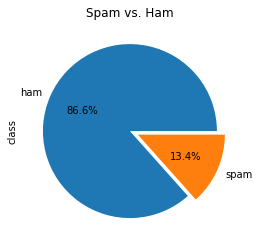

In [5]:
df['class'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%').set_title('Spam vs. Ham')

We observe that as on 13.4% of the data consits of spam messages the data is highly imbalanced.

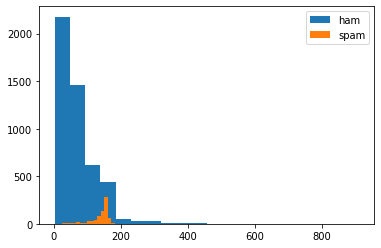

In [6]:
plt.hist(df[(df['class'] == "ham")]['sms'].str.len(),bins=20,label='ham')
plt.hist(df[(df['class'] == "spam")]['sms'].str.len(),bins=20,label='spam')
plt.legend()
plt.show()

## Most common words 

In [7]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def w_cloud(df, title):
    comment_words = ''
    for val in df:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black', colormap='Set2',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

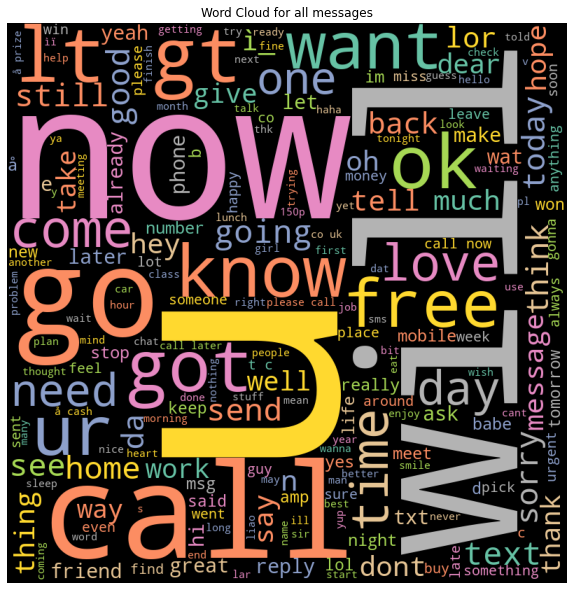

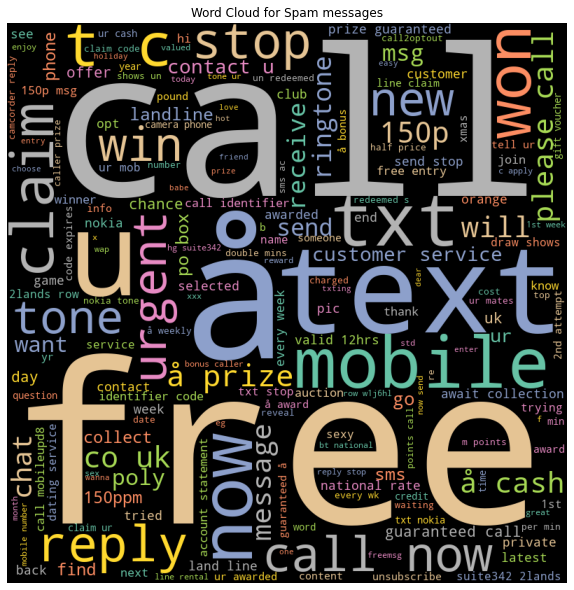

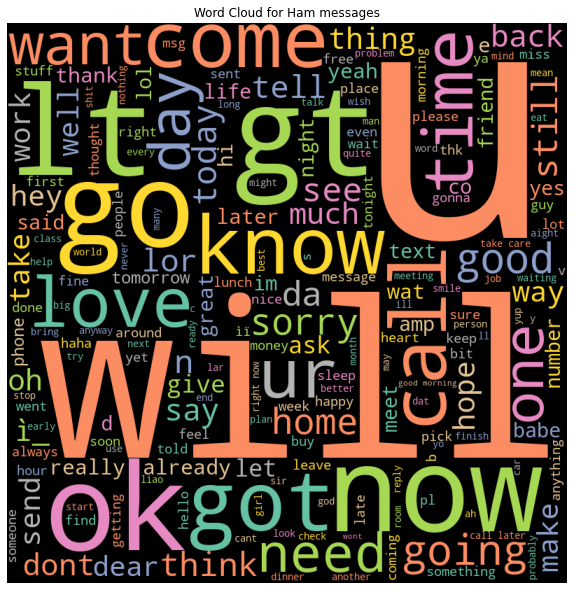

In [8]:
w_cloud(df.sms, 'Word Cloud for all messages')
w_cloud(df[(df['class'] == "spam")].sms, 'Word Cloud for Spam messages')
w_cloud(df[(df['class'] == "ham")].sms, 'Word Cloud for Ham messages')

### Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['class'] = encode.fit_transform(df['class'])

In [10]:
stuff_to_be_removed = list(stopwords)+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
corpus = df['sms'].tolist()
for i in range(10):
    print(corpus[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R enti

In [11]:
final_corpus = []
for i in range(len(corpus)):
    word = word_tokenize(corpus[i].lower())
    word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
    j = " ".join(word)
    final_corpus.append(j)
    
for i in range(10):
    print(final_corpus[i])

go jurong point crazy .. avail bug n gre world la e buffet ... cin got am wat ...
ok lar ... jok wif u on ...
fre entry 2 wkly comp win fa cup fin tkts 21st may 2005. text fa 87121 receiv entry quest std txt rat t c 's apply 08452810075over18 's
u dun say ear hor ... u c already say ...
nah n't think goe usf liv around though
freemsg hey darl 's 3 week 's now word back 'd fun stil tb ok xxx std chgs send å£1.50 rcv
ev broth speak tre aid pat
per request 'melle mel oru minnaminungint nurungu vettam set callertun cal press 9 cop friend callertun
win valu network custom select receive å£900 priz reward claim cal 09061701461. claim cod kl341 valid 12 hour
mobl 11 month u entitl upd latest colo mobl camer fre cal mobl upd co fre 08002986030


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
print(X)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train, X_test, y_train, y_test = train_test_split(X, df['class'].to_list(), test_size=0.2, random_state=42)

In [14]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)
ypred = nb.predict(X_test)

print("Test Accuracy (Naive Bayes): ",accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Test Accuracy (Naive Bayes):  0.9641255605381166
[[965   0]
 [ 40 110]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
ypred = dtc.predict(X_test)

print("Test Accuracy (Random Forest): ",accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Test Accuracy (Random Forest):  0.95695067264574
[[941  24]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.84      0.84      0.84       150

    accuracy                           0.96      1115
   macro avg       0.91      0.91      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)

print("Test Accuracy (Random Forest): ",accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Test Accuracy (Random Forest):  0.97847533632287
[[965   0]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [18]:
import xgboost as xgb

xg_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='error')
xg_clf.fit(np.array(X_train),np.array(y_train))
ypred = xg_clf.predict(X_test)

print("Test Accuracy (xgboost): ",accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Test Accuracy (xgboost):  0.9730941704035875
[[958   7]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.95      0.85      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### The best performing model for this dataset is the Random Forest Classifier.